In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import rc, font_manager
ticks_font = font_manager.FontProperties(family='serif', style='normal',
                                         size=24, weight='normal', stretch='normal')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression

In [2]:
from kagome_tools import *

In [117]:
#data = pd.read_csv('./bulk_1_all_label_kagome_distortions.csv')
data = pd.read_csv('./bulk_1_all_grouped_multi_gph_expand_20241111.csv')

In [118]:
import ast

In [119]:
data.columns

Index(['Unnamed: 0', 'cifs_ids', 'cifs_name', 'space_group_num', 'num_atom',
       'composition', 'unique_gph_files', 'plane_fun_gph', 'CN_plane',
       'CN_group_index', 'angle_labels', 'distance_mean_60', 'distance_std_60',
       'angles_mean_60', 'angles_std_60', 'angles_60_data', 'distance_60_data',
       'distance_mean_120', 'distance_std_120', 'angles_mean_120',
       'angles_std_120', 'angles_120_data', 'distance_120_data',
       'unique_angles', 'plane_unique_site_comp', 'net_names'],
      dtype='object')

In [120]:
def model_distance_std(angle_std,a):
    x = angle_std
    return a*x


In [121]:
G_1_index = []
for i in data.index:
    
    cn_group_index = (data['CN_group_index'][i])
    #print(cn_group_index)
    if 1 == cn_group_index:
        G_1_index.append(i)

In [122]:
distance_60_data = []
unique_1NN_distance = []
n = 0
for string in data['distance_60_data']:
    try:
        
        data_list = ast.literal_eval(string)
        distance_60_data.append(data_list)
        unique_1NN_distance.append(len(np.unique(data_list)))
        n+=1
    except:
        
        distance_60_data.append('NA')
        unique_1NN_distance.append('NA')
print(n)

angles_60_data = []
angle_lt_60_ratio = []
n = 0
for string in data['angles_60_data']:
    try:
        data_list = ast.literal_eval(string)
        angles_60_data.append(data_list)
        ratio = len([ang for ang in data_list if ang>60])/len(data_list) 
        angle_lt_60_ratio.append(ratio)
        n+=1
    except:
        angles_60_data.append('NA')
        angle_lt_60_ratio.append('NA')
print(n)

n = 0
unique_angles_data = []
for string in data['unique_angles']:
    try:
        data_list = ast.literal_eval(string)
        unique_angles_data.append(data_list)
        n+=1
    except:
        unique_angles_data.append('NA')
print(n)


n = 0
G_1_angles_std_around_60 = []
for string in data['angles_mean_60']:
    if not np.isnan(string):
        data_list = string
        G_1_angles_std_around_60.append(data_list)
        n+=1
    else:
        #G_1_angles_std_around_60.append('NA')
        continue
print(n)


n = 0
G_1_djk_std_around_60 = []
for string in data['angles_std_60']:
    if not np.isnan(string):
        data_list = string
        G_1_djk_std_around_60.append(data_list)
        n+=1
    else:
        #G_1_djk_std_around_60.append('NA')
        continue
print(n)


distance_120_data = []
unique_2NN_distance = []
n = 0
for string in data['distance_120_data']:
    try:
        
        data_list = ast.literal_eval(string)
        distance_120_data.append(data_list)
        unique_2NN_distance.append(len(np.unique(data_list)))
        n+=1
    except:
        
        distance_120_data.append('NA')
        unique_2NN_distance.append('NA')
print(n)

angles_120_data = []
angle_lt_120_ratio = []
n = 0
for string in data['angles_120_data']:
    try:
        data_list = ast.literal_eval(string)
        angles_120_data.append(data_list)
        ratio = len([ang for ang in data_list if ang>120])/len(data_list) 
        angle_lt_120_ratio.append(ratio)
        n+=1
    except:
        angles_120_data.append('NA')
        angle_lt_120_ratio.append('NA')
print(n)


n = 0
G_1_angles_std_around_120 = []
for string in data['angles_mean_120']:
    if not np.isnan(string):
        data_list = string
        G_1_angles_std_around_120.append(data_list)
        n+=1
    else:
        #G_1_angles_std_around_120.append('NA')
        continue
print(n)


n = 0
G_1_djk_std_around_120 = []
for string in data['angles_std_120']:
    if not np.isnan(string):
        data_list = string
        G_1_djk_std_around_120.append(data_list)
        n+=1
    else:
        #G_1_djk_std_around_120.append('NA')
        continue
print(n)




8460
8460
8460
8460
8460
8460
8460
8460
8460


In [123]:
        
data['angles_60_data'] = angles_60_data
data['angle_lt_60_ratio'] = angle_lt_60_ratio
data['distance_60_data'] = distance_60_data
data['unique_1NN_distance'] = unique_1NN_distance
data['unique_angles'] = unique_angles_data


        
data['angles_120_data'] = angles_120_data
data['angle_lt_120_ratio'] = angle_lt_120_ratio
data['distance_120_data'] = distance_120_data
data['unique_2NN_distance'] = unique_2NN_distance



In [124]:
import plotly.graph_objects as go


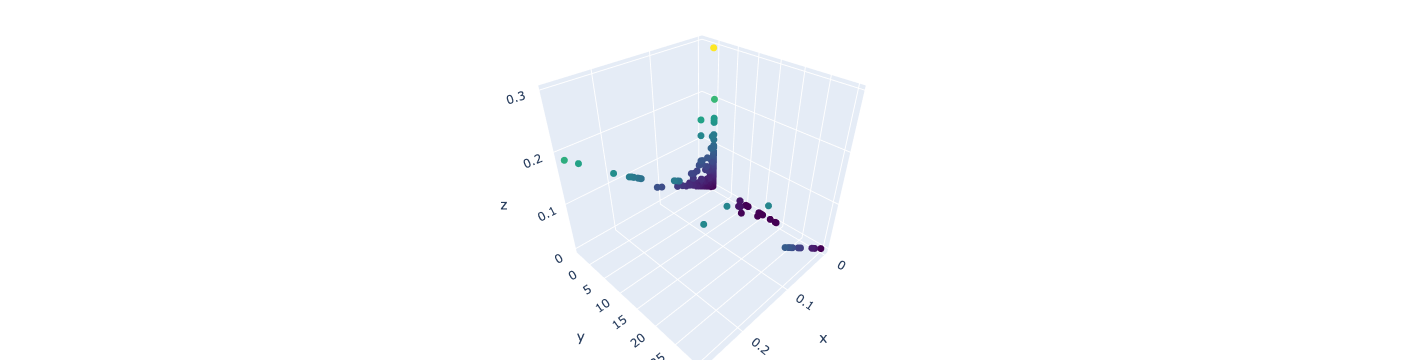

In [125]:
x = data['angles_std_60']/data['angles_mean_60']
y = (data['angles_mean_60']-60)
z = data['distance_std_60']/data['distance_mean_60']


fig = go.Figure(
    data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=4,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [126]:
# separate structures with angles_mean deviate from 60 by 0 to 2.5 degrees
mask_angle_mean_0 = np.abs(data['angles_mean_60']-60)<=2.5
angle_mean_dev_0 = data[mask_angle_mean_0]


# separate structures with angles_mean deviate from 60 by 2.5 to 5 degrees
mask_angle_mean_1 = (np.abs(data['angles_mean_60']-60)>2.5)&(np.abs(data['angles_mean_60']-60)<=5)
angle_mean_dev_1 = data[mask_angle_mean_1]


# separate structures with angles_mean deviate from 60 by 5 to 10 degrees
mask_angle_mean_2 = (np.abs(data['angles_mean_60']-60)>5)&(np.abs(data['angles_mean_60']-60)<=10)
angle_mean_dev_2 = data[mask_angle_mean_2]


# separate structures with angles_mean deviate from 60 by more than 10 degrees
mask_angle_mean_3 = (np.abs(data['angles_mean_60']-60)>10)
angle_mean_dev_3 = data[mask_angle_mean_3]

angle_mean_masks = [mask_angle_mean_0,mask_angle_mean_1,mask_angle_mean_2,mask_angle_mean_3]

In [127]:
mask_angle_mean_4 = (np.abs(data['angles_mean_60']-60)>15)&(np.abs(data['angles_mean_60']-60)<20)
angle_mean_dev_4 = data[mask_angle_mean_4]
#data[mask_angle_mean_4]

In [128]:
data[mask_angle_mean_3]

,Unnamed: 0,cifs_ids,cifs_name,space_group_num,num_atom,composition,unique_gph_files,plane_fun_gph,CN_plane,CN_group_index,...,angles_std_120,angles_120_data,distance_120_data,unique_angles,plane_unique_site_comp,net_names,angle_lt_60_ratio,unique_1NN_distance,angle_lt_120_ratio,unique_2NN_distance
372,372,intermetallics_search_041982.cif,intermetallics_search_041982.cif,74,4,"defaultdict(<class 'float'>, {'Ga3+': 2.0, 'Sb...",GaSb-41982-Cagome_big_3.gph,"[0.0, 0.5177948399999996, 0.0, 0.6385704864299...","[4, 4]",1.0,...,29.45631,"[99.874, 99.874, 80.126, 80.126, 160.253, 99.8...","[4.10574, 4.10574, 3.45428, 3.45428, 5.10001, ...","[80.126, 99.874, 160.253]",1.0,Likely_Empty,1.0,2,0.2,3
753,753,intermetallics_search_057308.cif,intermetallics_search_057308.cif,141,4,"defaultdict(<class 'float'>, {'Ga3+': 2.0, 'Sb...",GaSb-57308-Cagome_big.gph,"[-0.40576170250000004, -2.4845738509160287e-17...","[4, 4]",1.0,...,27.39918,"[105.383, 105.383, 149.235, 74.617, 74.617, 10...","[4.40345, 4.40345, 5.1785, 3.35724, 3.35724, 4...","[74.617, 105.383, 149.235]",1.0,Likely_Empty,1.0,1,0.2,3
1048,1048,intermetallics_search_058041.cif,intermetallics_search_058041.cif,65,16,"defaultdict(<class 'float'>, {'Al0+': 6.0, 'Ni...",Al3Ni5-58041-Cagome_big.gph,"[-2.173713078578005e-17, -2.1737130785780045e-...","[4, 4, 4, 4, 4, 4, 4, 4]",1.0,...,6.16200,"[96.162, 96.162, 83.838, 83.838, 96.162, 96.16...","[3.72, 3.72, 3.34, 3.34, 3.72, 3.72, 3.34, 3.3...","[83.838, 96.162]",2.0,Likely_Empty,1.0,2,0.0,2
1326,1326,intermetallics_search_058857.cif,intermetallics_search_058857.cif,141,4,"defaultdict(<class 'float'>, {'Bi0+': 2.0, 'Sn...",BiSn-58857-Cagome_big.gph,"[-0.542673175, -3.322914833734407e-17, -5.9164...","[4, 4]",1.0,...,27.49790,"[104.992, 104.992, 150.017, 75.008, 75.008, 10...","[5.07202, 5.07202, 6.07, 3.89309, 3.89309, 5.0...","[75.008, 104.992, 150.017]",1.0,Likely_Empty,1.0,1,0.2,3
1437,1437,intermetallics_search_059534.cif,intermetallics_search_059534.cif,141,4,"defaultdict(<class 'float'>, {'In0+': 0.2, 'Sn...",In0.05Sn0.95-59534-Cagome_big.gph,"[-0.51013941, -3.1237029778770925e-17, -1.7749...","[4, 4]",1.0,...,27.42558,"[105.274, 105.274, 149.452, 74.726, 74.726, 10...","[4.93173, 4.93173, 5.828, 3.767, 3.767, 4.9317...","[74.726, 105.274, 149.452]",1.0,Likely_Empty,1.0,1,0.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15213,15213,intermetallics_search_650477.cif,intermetallics_search_650477.cif,139,6,"defaultdict(<class 'float'>, {'Ti0+': 4.199999...",(Rh0.9Ti0.1)Ti2-650477-Cagome_big_10.gph,"[0.7158148714285716, 0.7158148714285717, 0.0, ...","[4, 4, 4, 4, 4, 4]",1.0,...,0.15603,"[106.013, 105.682, 105.682, 105.682, 106.013, ...","[4.3275, 4.32751, 4.32751, 4.32751, 4.3275, 4....","[74.153, 74.318, 105.682, 106.013]",2.0,Likely_Empty,1.0,2,0.0,2
15214,15214,intermetallics_search_650477.cif,intermetallics_search_650477.cif,139,6,"defaultdict(<class 'float'>, {'Ti0+': 4.199999...",(Rh0.9Ti0.1)Ti2-650477-Cagome_big_4.gph,"[-0.8338652999999999, 0.8338652999999999, 0.0,...","[4, 4, 4, 4, 4, 4]",1.0,...,0.15603,"[105.682, 105.682, 105.682, 105.682, 106.013, ...","[4.32751, 4.32751, 4.32751, 4.32751, 4.3275, 4...","[74.153, 74.318, 105.682, 106.013]",2.0,Likely_Empty,1.0,2,0.0,2
15215,15215,intermetallics_search_650477.cif,intermetallics_search_650477.cif,139,6,"defaultdict(<class 'float'>, {'Ti0+': 4.199999...",(Rh0.9Ti0.1)Ti2-650477-Cagome_big_5.gph,"[-0.50182164, 0.50182164, 0.0, 0.0]","[4, 4, 4, 4, 4, 4]",1.0,...,0.15603,"[106.013, 105.682, 105.682, 105.682, 106.013, ...","[4.3275, 4.32751, 4.32751, 4.32751, 4.3275, 4....","[74.153, 74.318, 105.682, 106.013]",2.0,Likely_Empty,1.0,2,0.0,2
15688,15688,intermetallics_search_659364.cif,intermetallics_search_659364.cif,141,4,"defaultdict(<class 'float'>, {'In3+': 2.0, 'Sb...",InSb-659364-Cagome_big.gph,"[-0.48629592000000016, -2.9777037093320877e-17...","[4, 4]",1.0,...,27.43430,"[105.239, 105.239, 149.522, 74.761, 74.761, 10...","[4.81335, 4.8

In [129]:
#data[(data['space_group_num']==189)&(data['distance_60_data']!='NA')]

In [130]:
#data[angle_mean_masks[0]][data[angle_mean_masks[0]]['space_group_num']==216]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$\\mathrm{\\delta(d) / \\bar d}$')

<Figure size 432x288 with 0 Axes>

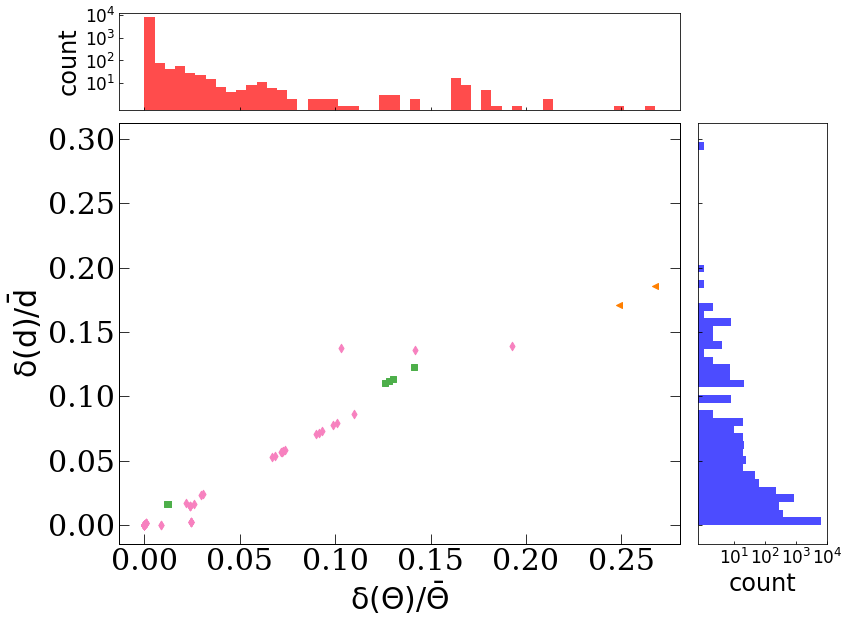

In [131]:
plt.draw()
f = plt.figure(figsize=(12,9))

#(ax1) = f.subplots(1,1)
#(ax1) = f.subplots(1,1)
ax1 = f.add_axes([0.1, 0.1, 0.65, 0.65])  # [left, bottom, width, height]

# Create axes for histograms
ax_histx = f.add_axes([0.1, 0.77, 0.65, 0.15], sharex=ax1)
ax_histy = f.add_axes([0.77, 0.1, 0.15, 0.65], sharey=ax1)


[i.set_linewidth(1) for i in ax1.spines.values()]

#ax1.set_ylim(-0.01,0.2)
#ax1.set_xlim(-1,16)
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00','k']
                  
markers = ['o','<','s','d','x','>','v']


x = data.iloc[G_1_index]['angles_std_60']/data.iloc[G_1_index]['angles_mean_60']
y = data.iloc[G_1_index]['distance_std_60']/data.iloc[G_1_index]['distance_mean_60']
#ax1.scatter(x,y,color='k',lw=2.5,label='')

for i  in range(len(angle_mean_masks))[1:]:
    mask = angle_mean_masks[i]
    x_ = data[mask]['angles_std_60']/data[mask]['angles_mean_60']
    y_ = data[mask]['distance_std_60']/data[mask]['distance_mean_60']
    ax1.scatter(x_,y_,color=CB_color_cycle[i],marker=markers[i])#,label='Group: '+str(i+1))
# Plot the histograms
bins = 50
ax_histx.hist(x, bins=bins, color='r', alpha=0.7)
ax_histy.hist(y, bins=bins, orientation='horizontal', color='blue', alpha=0.7)

# Remove tick labels on histogram axes

ax_histx.tick_params(axis='x', labelbottom=False,tickdir='in',labelsize=20)
ax_histy.tick_params(axis='y', labelleft=False,tickdir='in',labelsize=16)

ax_histx.tick_params(axis='y',tickdir='in',labelsize=17)
ax_histy.tick_params(axis='x',tickdir='in',labelsize=17)

#ax1.set_yscale('log')

ax_histx.set_yscale('log');ax_histy.set_xscale('log')
ax_histy.set_xticks([1e1,1e2,1e3,1e4])   
ax_histx.set_yticks([1e1,1e2,1e3,1e4])   

ax_histy.set_xlabel('count',fontsize=24)
ax_histx.set_ylabel('count',fontsize=24)
ax1.tick_params(direction='in',axis='both',length=10,right=True)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)

#ax1.set_yscale('log')
#ax1.set_xscale('log')

ax1.set_xlabel(r'$\mathrm{\delta(\Theta)} / \bar \Theta$',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False)
ax1.set_ylabel(r'$\mathrm{\delta(d) / \bar d}$',fontproperties=ticks_font)






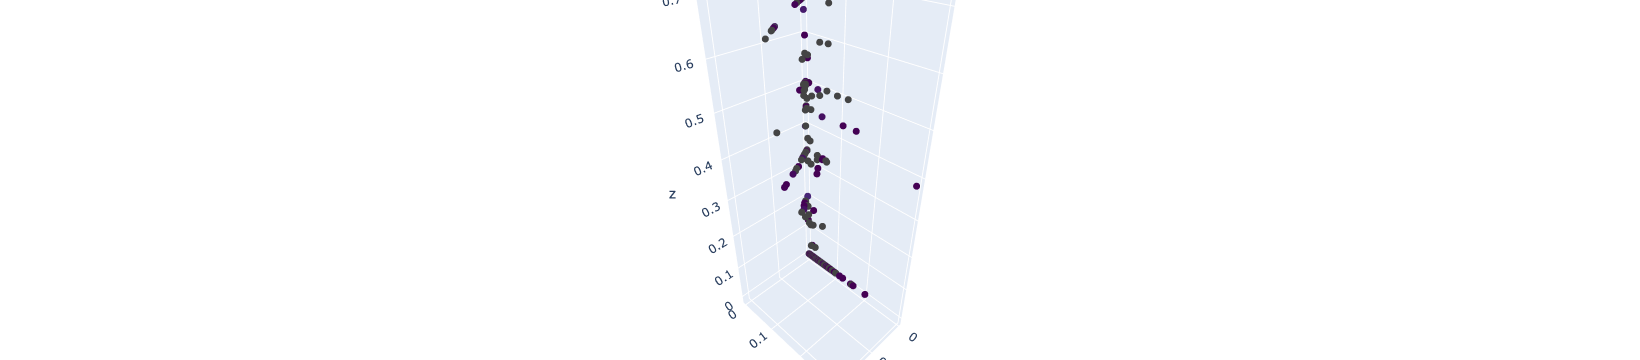

In [132]:
mask_angle_mean_0 = np.abs(data['angles_mean_60']-60)<=2.5
angle_mean_dev_0 = data[mask_angle_mean_0]

y_ = angle_mean_dev_0['distance_std_60']/angle_mean_dev_0['distance_mean_60']
x_ = angle_mean_dev_0['angles_std_60']/angle_mean_dev_0['angles_mean_60']

z_ = np.array([len([ang for ang in datalist if ang>60])/len(datalist) for datalist in angle_mean_dev_0['angles_60_data']])#-0.5

fig = go.Figure(
    data=[go.Scatter3d(
    x=x_,
    y=y_,
    z=z_,
    mode='markers',
    marker=dict(
        size=4,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [151]:
# perfect Kagome
test_mask = ((np.abs(data['angles_mean_60']-60)<=2.5)&
             ((data['angles_std_60']/data['angles_mean_60']>=0)&(data['angles_std_60']/data['angles_mean_60']<=0.000001)&
              (data['angles_std_120']/data['angles_mean_120']>=0)&(data['angles_std_120']/data['angles_mean_120']<=0.000002)&
             (data['distance_std_60']/data['distance_mean_60']>=0.0)&(data['distance_std_60']/data['distance_mean_60']<=0.000001)))
distortion_index_1_out = []

for i in range(len(test_mask)):
    if (len(data['unique_angles'][i])!=2)&(test_mask[i]==True):
        for ang in data['unique_angles'][i]:
            if np.abs(ang-60)>0.01:
                if np.abs(ang-120)>0.01:
                    if np.abs(ang-180)>0.01:
                        test_mask[i]=False
                            
        if test_mask[i]==False:
            distortion_index_1_out.append(i)
    if (data['plane_unique_site_comp'][i]>1)&(test_mask[i]==True):
        test_mask[i]=False
        distortion_index_1_out.append(i)
        
test_data_ = data[test_mask]
distortion_index_1 = test_data_.index
test_data_.sort_values('angles_std_60')


,Unnamed: 0,cifs_ids,cifs_name,space_group_num,num_atom,composition,unique_gph_files,plane_fun_gph,CN_plane,CN_group_index,...,angles_std_120,angles_120_data,distance_120_data,unique_angles,plane_unique_site_comp,net_names,angle_lt_60_ratio,unique_1NN_distance,angle_lt_120_ratio,unique_2NN_distance
1,1,intermetallics_search_000074.cif,intermetallics_search_000074.cif,191,13,"defaultdict(<class 'float'>, {'Fe0+': 3.000199...",Fe3Mn4Ge6-74-Cagome_big.gph,"[9.84556895428385e-16, 1.7053025658242402e-15,...","[4, 4, 4]",1.0,...,0.0,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0]","[4.43405, 4.43405, 4.43405, 4.43405, 4.43405, ...","[60.0, 120.0]",1.0,Likely_Empty,0.0,1,0.0,1
11241,11241,intermetallics_search_609675.cif,intermetallics_search_609675.cif,227,24,"defaultdict(<class 'float'>, {'Yb0+': 8.0, 'Al...",Al2Yb-609675-Cagome_big.gph,"[-0.06692905280172415, 0.06692905280172415, 0....","[4, 4, 4, 4, 4, 4, 4, 4, 4]",1.0,...,0.0,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120...","[4.8261, 4.8261, 4.8261, 4.8261, 4.8261, 4.826...","[60.0, 120.0]",1.0,Likely_Empty,0.0,1,0.0,1
11240,11240,intermetallics_search_609674.cif,intermetallics_search_609674.cif,227,24,"defaultdict(<class 'float'>, {'Yb0+': 8.0, 'Al...",Al2Yb-609674-Cagome_big.gph,"[-0.12916640833333334, -0.12916640833333334, 0...","[4, 4, 4, 4, 4, 4, 4, 4, 4]",1.0,...,0.0,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120...","[4.82182, 4.82182, 4.82182, 4.82182, 4.82182, ...","[60.0, 120.0]",1.0,Likely_Empty,0.0,1,0.0,1
11239,11239,intermetallics_search_609673.cif,intermetallics_search_609673.cif,227,24,"defaultdict(<class 'float'>, {'Yb0+': 8.0, 'Al...",Al2Yb-609673-Cagome_big.gph,"[-0.17377164179104476, 0.17377164179104476, 0....","[4, 4, 4, 4, 4, 4, 4, 4, 4]",1.0,...,0.0,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120...","[4.82549, 4.82549, 4.82549, 4.82549, 4.82549, ...","[60.0, 120.0]",1.0,Likely_Empty,0.0,1,0.0,1
11236,11236,intermetallics_search_609665.cif,intermetallics_search_609665.cif,227,24,"defaultdict(<class 'float'>, {'Y0+': 8.0, 'Al0...",Al2Y-609665-Cagome_big.gph,"[-0.06756853070175435, 0.06756853070175436, 0....","[4, 4, 4, 4, 4, 4, 4, 4, 4]",1.0,...,0.0,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120...","[4.80712, 4.80712, 4.80712, 4.80712, 4.80712, ...","[60.0, 120.0]",1.0,Likely_Empty,0.0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,5269,intermetallics_search_150534.cif,intermetallics_search_150534.cif,227,24,"defaultdict(<class 'float'>, {'Dy0+': 8.0, 'Ni...",DyNi2-150534-Cagome_big.gph,"[-0.1045249262295082, 0.10452492622950818, 0.1...","[4, 4, 4, 4, 4, 4, 4, 4, 4]",1.0,...,0.0,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120...","[4.37357, 4.37357, 4.37357, 4.37357, 4.37357, ...","[60.0, 120.0]",1.0,Likely_Empty,0.0,1,0.0,1
5250,5250,intermetallics_search_150511.cif,intermetallics_search_150511.cif,227,24,"defaultdict(<class 'float'>, {'Pr0+': 8.0, 'Pt...",PrPt2-150511-Cagome_big.gph,"[-0.11607164257812501, 0.11607164257812495, 0....","[4, 4, 4, 4, 4, 4, 4, 4, 4]",1.0,...,0.0,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120...","[4.72077, 4.72077, 4.72077, 4.72077, 4.72077, ...","[60.0, 120.0]",1.0,Likely_Empty,0.0,1,0.0,1
5249,5249,intermetallics_search_150509.cif,intermetallics_search_150509.cif,227,24,"defaultdict(<class 'float'>, {'Pr0+': 8.0, 'Ru...",PrRu2-150509-Cagome_big.gph,"[0.12314698305084744, -0.12314698305084744, -0...","[4, 4, 4, 4, 4, 4, 4, 4, 4]",1.0,...,0.0,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120...","[4.66873, 4.66873, 4.66873, 4.66873, 4.66873, ...","[60.0, 120.0]",1.0,Likely_Empty,0.0,1,0.0,1
5359,5359,intermetallics_search_150738.cif,intermetallics_search_150738.cif,227,24,"defaultdict(<class 'float'>, {'Er0+': 8.0, 'Fe...",ErFe2-150738-Cagome_big.gph,"[0.13227768999999998, -0.13227769, 0.132277689...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]",1.0,...,0.0,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120...","[4.4544, 4.4544, 4.4544, 4.4544, 4.4544, 4.454...","[60.0, 120.0]",1.

In [152]:
#np.unique(test_data_['plane_unique_site_comp'].values)
#list(distortion_index_1).index(3294)

In [153]:
# near perfect Kagome
# std <=0.001
test_mask = ((np.abs(data['angles_mean_60']-60)<=5)&
             ((data['angles_std_60']/data['angles_mean_60']>=0.0)&(data['angles_std_60']/data['angles_mean_60']<=0.001))&
             ((data['distance_std_60']/data['distance_mean_60']>=0.0)&(data['distance_std_60']/data['distance_mean_60']<=0.001)))

distortion_index_2_out = []
for i in range(len(test_mask)):
    if i not in distortion_index_1:
        if test_mask[i]==True:
            for ang in data['unique_angles'][i]:
                if np.abs(ang-60)>2:
                    if np.abs(ang-120)>2:
                        if np.abs(ang-180)>5:
                            test_mask[i]=False
        if test_mask[i]==False:
            distortion_index_2_out.append(i)
    else:
        test_mask[i]=False
        
test_data_ = data[test_mask]
distortion_index_2 = test_data_.index
#test_data_.sort_values('angles_std')


In [154]:
len(distortion_index_2),len(distortion_index_1)

(190, 5189)

In [157]:
data.iloc[distortion_index_2].sort_values('plane_unique_site_comp')

,Unnamed: 0,cifs_ids,cifs_name,space_group_num,num_atom,composition,unique_gph_files,plane_fun_gph,CN_plane,CN_group_index,...,angles_std_120,angles_120_data,distance_120_data,unique_angles,plane_unique_site_comp,net_names,angle_lt_60_ratio,unique_1NN_distance,angle_lt_120_ratio,unique_2NN_distance
4,4,intermetallics_search_000458.cif,intermetallics_search_000458.cif,191,22,"defaultdict(<class 'float'>, {'Tb0+': 2.0, 'Fe...",Tb2(Fe0.832Al0.168)17-458-Cagome_big.gph,"[-1.5820614745242897e-17, -2.7402108545734038e...","[4, 4, 4, 4, 4, 4, 4, 4, 4]",1.0,...,0.01633,"[120.0, 120.02, 120.0, 120.02, 120.0, 120.02, ...","[4.26686, 4.266, 4.26686, 4.266, 4.26686, 4.26...","[59.99, 60.02, 119.98, 120.0, 120.02]",1.0,Likely_Empty,0.333333,2,0.333333,3
7138,7138,intermetallics_search_188605.cif,intermetallics_search_188605.cif,166,57,"defaultdict(<class 'float'>, {'U0+': 6.0, 'Cu0...",U2Cu11Ga6-188605-Cagome_big.gph,"[-5.397011888025871e-17, -3.1159662663713465e-...","[4, 4, 4, 4, 4, 4, 4, 4, 4]",1.0,...,0.00047,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120...","[4.35025, 4.35025, 4.35025, 4.35025, 4.35025, ...","[60.0, 119.999, 120.0]",1.0,Likely_Empty,0.0,2,0.0,1
7139,7139,intermetallics_search_188605.cif,intermetallics_search_188605.cif,166,57,"defaultdict(<class 'float'>, {'U0+': 6.0, 'Cu0...",U2Cu11Ga6-188605-Cagome_big_1.gph,"[-2.9352169917333684e-17, -1.6946483203072237e...","[4, 4, 4, 4, 4, 4, 4, 4, 4]",1.0,...,0.00047,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120...","[4.35025, 4.35025, 4.35025, 4.35025, 4.35025, ...","[60.0, 119.999, 120.0]",1.0,Likely_Empty,0.0,2,0.0,1
7140,7140,intermetallics_search_188606.cif,intermetallics_search_188606.cif,166,57,"defaultdict(<class 'float'>, {'U0+': 6.0, 'Cu0...",U2Cu12Ga5-188606-Cagome_big.gph,"[-5.388699726736342e-17, -3.1111672378132875e-...","[4, 4, 4, 4, 4, 4, 4, 4, 4]",1.0,...,0.00047,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120...","[4.34355, 4.34355, 4.34355, 4.34355, 4.34355, ...","[60.0, 119.999, 120.0]",1.0,Likely_Empty,0.0,2,0.0,1
7141,7141,intermetallics_search_188606.cif,intermetallics_search_188606.cif,166,57,"defaultdict(<class 'float'>, {'U0+': 6.0, 'Cu0...",U2Cu12Ga5-188606-Cagome_big_1.gph,"[-2.9306963426109933e-17, -1.6920383223195077e...","[4, 4, 4, 4, 4, 4, 4, 4, 4]",1.0,...,0.00047,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0, 120...","[4.34355, 4.34355, 4.34355, 4.34355, 4.34355, ...","[60.0, 119.999, 120.0]",1.0,Likely_Empty,0.0,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4455,4455,intermetallics_search_107479.cif,intermetallics_search_107479.cif,166,72,"defaultdict(<class 'float'>, {'Sm0+': 6.000000...",Fe15.8Ga1.2Sm2-107479-Cagome_big_1.gph,"[1.037974875290805e-32, -5.018208071305706e-17...","[4, 4, 4, 4, 4, 4, 4, 4, 4]",1.0,...,0.07778,"[119.945, 119.78, 119.945, 119.78, 119.945, 11...","[4.294, 4.29399, 4.294, 4.29399, 4.294, 4.2939...","[59.972, 60.055, 119.78, 119.945, 175.954]",2.0,Likely_Empty,0.333333,2,0.0,2
4454,4454,intermetallics_search_107479.cif,intermetallics_search_107479.cif,166,72,"defaultdict(<class 'float'>, {'Sm0+': 6.000000...",Fe15.8Ga1.2Sm2-107479-Cagome_big.gph,"[-0.004720663735181753, -0.0027254764782608594...","[4, 4, 4, 4, 4, 4, 4, 4, 4]",1.0,...,0.07778,"[119.945, 119.78, 119.945, 119.945, 119.945, 1...","[4.294, 4.29399, 4.294, 4.294, 4.294, 4.29399,...","[59.972, 60.055, 119.78, 119.945, 175.954]",2.0,Likely_Empty,0.333333,2,0.0,2
5244,5244,intermetallics_search_150497.cif,intermetallics_search_150497.cif,12,12,"defaultdict(<class 'float'>, {'Be0+': 5.0, 'Al...",FeAl2Be2.5-150497-Cagome_big.gph,"[-0.4060775144134409, -7.401486830834377e-17, ...","[4, 4, 4, 4, 4, 4]",1.0,...,0.00471,"[120.007, 120.007, 120.007, 120.007, 119.997, ...","[3.85901, 3.85901, 3.85901, 3.85901, 3.85862, ...","[59.993, 60.003, 119.997, 120.007]",2.0,Likely_Empty,0.666667,2,0.333333,2
3386,3386,intermetallics_search_104754.cif,intermetallics_search_104754.cif,194,96,"defaultdict(<class 'float'>, {'Li0+':

In [56]:
# distortion cannot be ignored and need to tell the types by calculating the distances to different modes
# 
test_mask = ((np.abs(data['angles_mean_60']-60)<=15))
test_data_ = data[test_mask]
lump_1_2 = list(distortion_index_1)+list(distortion_index_2)
distortion_index_3_total = [x for x in test_data_.index if x not in lump_1_2 ]


In [57]:
data.iloc[distortion_index_3_total]

,Unnamed: 0,cifs_ids,cifs_name,space_group_num,num_atom,composition,unique_gph_files,plane_fun_gph,CN_plane,CN_group_index,...,angles_mean_120,angles_std_120,angles_120_data,distance_120_data,unique_angles,net_names,angle_lt_60_ratio,unique_1NN_distance,angle_lt_120_ratio,unique_2NN_distance
11,11,intermetallics_search_002054.cif,intermetallics_search_002054.cif,194,36,"defaultdict(<class 'float'>, {'Sm0+': 8.0, 'Co...",Sm2Co7-2054-Cagome_big.gph,"[-3.944304526105059e-31, -2.2634156682244118e-...","[4, 4, 4]",1.0,...,120.0000,0.00000,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0]","[4.36771, 4.36771, 4.36771, 4.36771, 4.36771, ...","[60.0, 120.0]",Likely_Empty,0.0,2,0.0,1
12,12,intermetallics_search_002054.cif,intermetallics_search_002054.cif,194,36,"defaultdict(<class 'float'>, {'Sm0+': 8.0, 'Co...",Sm2Co7-2054-Cagome_big_2.gph,"[-9.725232333843698e-16, -5.614865505876308e-1...","[4, 4, 4]",1.0,...,120.0000,0.00000,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0]","[4.36763, 4.36763, 4.36763, 4.36763, 4.36763, ...","[60.0, 120.0]",Likely_Empty,0.0,2,0.0,1
15,15,intermetallics_search_002306.cif,intermetallics_search_002306.cif,194,12,"defaultdict(<class 'float'>, {'Nb0+': 4.0, 'Al...",Nb(Al0.77Ir0.23)2-2306-Cagome_big.gph,"[9.824830955488813e-16, 5.672368796894033e-16,...","[4, 4, 4]",1.0,...,120.0000,0.00000,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0]","[4.415, 4.415, 4.415, 4.415, 4.415, 4.415]","[60.0, 120.0]",Likely_Empty,0.0,2,0.0,1
17,17,intermetallics_search_002351.cif,intermetallics_search_002351.cif,166,6,"defaultdict(<class 'float'>, {'Tb0+': 2.0, 'Fe...",TbFe2-2351-Cagome_big_1.gph,"[-2.7854762587280737, -1.964007702886267, 4.75...","[4, 4, 4]",1.0,...,120.0000,0.26870,"[120.38, 120.38, 119.81, 119.81, 119.81, 119.81]","[4.518, 4.518, 4.49213, 4.49213, 4.49213, 4.49...","[59.62, 60.19, 119.81, 120.38]",Likely_Empty,0.666667,2,0.333333,2
23,23,intermetallics_search_002741.cif,intermetallics_search_002741.cif,194,36,"defaultdict(<class 'float'>, {'Mg0+': 12.0, 'N...",Mg(Ni0.45Cu0.55)2-2741-Cagome_big.gph,"[-9.43062398937272e-16, -5.444773298890477e-16...","[4, 4, 4]",1.0,...,120.0000,0.00000,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0]","[4.25825, 4.25825, 4.25825, 4.25825, 4.25825, ...","[60.0, 120.0]",Likely_Empty,0.0,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17305,17305,intermetallics_search_683413.cif,intermetallics_search_683413.cif,115,12,"defaultdict(<class 'float'>, {'Mg0+': 3.0, 'Ni...",MgNi3-683413-Cagome_big_3.gph,"[0.0, 0.4128201887183997, 0.2820061171799999, ...","[4, 4, 4, 4, 4]",1.0,...,120.1138,0.47268,"[119.771, 120.234, 119.771, 120.234, 120.79, 1...","[4.12309, 4.10393, 4.12309, 4.10393, 4.14448, ...","[58.852, 59.543, 59.652, 59.766, 60.229, 60.57...",Likely_Empty,0.4,6,0.6,5
17306,17306,intermetallics_search_683413.cif,intermetallics_search_683413.cif,115,12,"defaultdict(<class 'float'>, {'Mg0+': 3.0, 'Ni...",MgNi3-683413-Cagome_big_4.gph,"[0.40087207994650004, 0.0, 0.286959786255, 1.1...","[4, 4, 4, 4, 4]",1.0,...,120.1138,0.47268,"[120.348, 119.426, 120.348, 119.426, 120.79, 1...","[4.09922, 4.13765, 4.09922, 4.13765, 4.14448, ...","[58.852, 59.543, 59.652, 59.766, 60.229, 60.57...",Likely_Empty,0.4,6,0.6,5
17307,17307,intermetallics_search_683413.cif,intermetallics_search_683413.cif,115,12,"defaultdict(<class 'float'>, {'Mg0+': 3.0, 'Ni...",MgNi3-683413-Cagome_big_7.gph,"[0.0, -0.4008720799465002, 0.28695978625500007...","[4, 4, 4, 4, 4]",1.0,...,120.1138,0.47268,"[120.348, 119.426, 120.348, 119.426, 119.771, ...","[4.09922, 4.13765, 4.09922, 4.13765, 4.12309, ...","[58.852, 59.543, 59.652, 59.766, 60.229, 60.57...",Likely_Empty,0.4,6,0.6,5
17385,17385,intermetallics_search_683951.cif,intermetallics_search_683951.cif,194,12,"defaultdict(<class 'float'>, {'Mg0+': 4.0, 'Zn...",MgZn2-683951-Cagome_big.gph,"[9.810827756602153e-16, 5.664284046247299e-16,...","[4, 4, 4]",1.0,...,120.0000,0.00000,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0]","[4.49558, 4.495

In [203]:
# too distorted to discard
# 1. std(d)/mean(d) > 0.2
# 2. |mean(theta)-60|>10
# 3. |mean(phi)-120|>20

test_mask = (np.abs(data['angles_mean_60']-60)<=10)#&(np.abs(data['angles_mean_120']-120)<=20)#&(data['distance_std_60']/data['distance_mean_60']<=0.2)
test_data_ = data[test_mask]
lump_1_2_3 = lump_1_2 
distortion_index_3_total = [x for x in test_data_.index if x not in lump_1_2  ]

In [204]:
data.iloc[distortion_index_3_total].sort_values('distance_std_60')

,Unnamed: 0,cifs_ids,cifs_name,space_group_num,num_atom,composition,unique_gph_files,plane_fun_gph,CN_plane,CN_group_index,...,angles_120_data,distance_120_data,unique_angles,plane_unique_site_comp,net_names,angle_lt_60_ratio,unique_1NN_distance,angle_lt_120_ratio,unique_2NN_distance,Kagome_group
6505,6505,intermetallics_search_171158.cif,intermetallics_search_171158.cif,189,44,"defaultdict(<class 'float'>, {'Rb+': 14.0, 'In...",Rb14(Mg0.208In0.792)30-171158-Cagome_big.gph,"[0.0, 0.0, 9.832666634264633, 33.18812388077367]","[4, 4, 4]",1.0,...,"[140.056, 140.056, 159.944, 80.056, 140.056, 1...","[10.0652, 10.0652, 10.54565, 6.88779, 10.0652,...","[60.0, 80.056, 140.056, 159.944]",1.0,Likely_Empty,0.0,1,0.75,3,Distorted
4228,4228,intermetallics_search_106461.cif,intermetallics_search_106461.cif,193,16,"defaultdict(<class 'float'>, {'Er0+': 2.04, 'C...",Co3Er1.02Ge2-106461-Cagome_big.gph,"[0.0, 0.0, 5.168186993857005, 10.15677948967748]","[4, 4, 4]",1.0,...,"[127.413, 112.587, 112.587, 127.413, 112.587, ...","[4.57384, 4.24404, 4.24404, 4.57384, 4.24404, ...","[60.0, 112.587, 127.413, 172.587]",1.0,Likely_Empty,0.0,1,0.5,2,Distorted
3296,3296,intermetallics_search_104623.cif,intermetallics_search_104623.cif,194,38,"defaultdict(<class 'float'>, {'Ca0+': 8.0, 'Al...",(Al1.325Li0.675)Ca-104623-Cagome_big_4.gph,"[0.0, 0.0, -0.5236809597618749, -7.36583453953...","[4, 4, 4, 4, 4, 4]",1.0,...,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0]","[2.88641, 2.88641, 2.88641, 2.88641, 2.88641, ...","[60.0, 90.0, 120.0, 150.0]",2.0,Likely_Empty,0.0,1,0.0,1,Distorted
3295,3295,intermetallics_search_104623.cif,intermetallics_search_104623.cif,194,38,"defaultdict(<class 'float'>, {'Ca0+': 8.0, 'Al...",(Al1.325Li0.675)Ca-104623-Cagome_big_1.gph,"[1.5985819567428936e-16, 9.229417230471876e-17...","[4, 4, 4, 4, 4, 4]",1.0,...,"[120.0, 120.0, 120.0, 120.0, 120.0, 120.0]","[2.88641, 2.88641, 2.88641, 2.88641, 2.88641, ...","[60.0, 90.0, 120.0, 150.0]",2.0,Likely_Empty,0.0,1,0.0,1,Distorted
6378,6378,intermetallics_search_167625.cif,intermetallics_search_167625.cif,189,9,"defaultdict(<class 'float'>, {'La0+': 3.0, 'In...",LaNiIn-167625-Cagome_big.gph,"[0.0, 0.0, 10.650789299994829, 21.61577688433951]","[4, 4, 4]",1.0,...,"[133.435, 106.565, 133.435, 106.565, 133.435, ...","[7.03584, 6.13987, 7.03584, 6.13987, 7.03584, ...","[60.0, 106.565, 133.435, 166.565]",1.0,Likely_Empty,0.0,1,0.5,2,Distorted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,9644,intermetallics_search_400782.cif,intermetallics_search_400782.cif,189,44,"defaultdict(<class 'float'>, {'K0+': 14.0, 'Tl...",K14Cd9Tl21-400782-Cagome_big.gph,"[0.0, -0.0, -27.415155141700268, -322.12167421...","[4, 4, 4]",1.0,...,"[137.935, 137.935, 137.935, 137.935, 137.935, ...","[9.884, 9.884, 9.884, 9.884, 9.884, 9.884]","[60.0, 77.935, 137.935, 162.065]",1.0,Likely_Empty,0.333333,2,1.0,1,Distorted
6292,6292,intermetallics_search_165345.cif,intermetallics_search_165345.cif,189,42,"defaultdict(<class 'float'>, {'Rb+': 15.0, 'Tl...",Rb15Tl27-165345-Cagome_big.gph,"[0.0, 0.0, 9.265933892429345, 30.00026968703581]","[4, 4, 4]",1.0,...,"[137.59, 137.59, 137.59, 137.59, 137.59, 137.59]","[10.32482, 10.32482, 10.32482, 10.32482, 10.32...","[60.0, 77.59, 137.59, 162.41]",1.0,Likely_Empty,0.333333,2,1.0,1,Distorted
6293,6293,intermetallics_search_165347.cif,intermetallics_search_165347.cif,189,42,"defaultdict(<class 'float'>, {'Cs+': 15.0, 'Tl...",Cs15Tl27-165347-Cagome_big.gph,"[0.0, 0.0, 9.906862128389186, 33.42983444838201]","[4, 4, 4]",1.0,...,"[138.281, 138.281, 138.281, 138.281, 138.281, ...","[10.50299, 10.50299, 10.50299, 10.50299, 10.50...","[60.0, 78.281, 138.281, 161.719]",1.0,Likely_Empty,0.333333,2,1.0,1,Distorted
6506,6506,intermetallics_search_171159.cif,intermetallics_search_171159.cif,189,44,"defaultdict(<class 'float'>, {'Rb+': 7.2100000...",(Rb0.515K0.485)14(Mg0.213In0.787)30-171159-Cag...,"[0.0, 0.0, -9.699265285649613, -32.01520837645...","[4, 4, 4]",1

In [258]:
#test_data_[test_data_['space_group_num']==194]

In [164]:
group_index = []
for index in data.index:
    if index in distortion_index_1:
        # perfect
        group_index.append('Perfect')
    elif index in distortion_index_2:
        # near perfect
        group_index.append('Near Perfect')
    elif index in distortion_index_3_total:
        # compress
        group_index.append('Distorted')
    else:
        group_index.append('NA')


In [165]:
data['Kagome_group']=group_index

In [189]:
data.to_csv('./bulk_1_all_label_kagome_distortions_multi_gph_expand_20241111.csv')